<a href="https://colab.research.google.com/github/hussain0048/Research-Work/blob/main/ANN_Based_Cardiovascular_Disease_Diagnostic_Model_By_Using_LMO_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Preprocessing</a></li>
         <li><a href="#pre-processing">Data Spliting </a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation"> Classification Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Decision Trees</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
         <li><a href="#evaluation">Compare Model performance</a></li>
         <li><a href="#evaluation">Pipelines</a></li>
         <li><a href="#evaluation">Ensemble techniques</a></li>
         <li><a href="#evaluation"> Regression Model Training and Evaluation
    </ul>
</div>
<br>
<hr>


# **1- Introduction**

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **2- Data Loading**

## **Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Research /Research Papers/ARTIFICIAL NEURAL NETWORK-BASED CARDIOVASCULAR DISEASE DIAGNOSTIC MODEL BY USING LEVENBERG-/dataset/cardio_train.csv',encoding = 'latin')

In [3]:
Train_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# **3- Preprocessing**

## **3.1 Drop Index Colum**

In [4]:
Train_data =Train_data.drop("id", axis=1)

In [5]:
Train_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [7]:
target_column = ['cardio']
predictors = list(set(list(Train_data.columns))-set(target_column))
Train_data[predictors] = Train_data[predictors]/Train_data[predictors].max()
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,0.821021,0.104046,0.455362,0.744908,0.830894,0.899380,1.0
gender,70000.0,0.674786,0.238419,0.500000,0.500000,0.500000,1.000000,1.0
height,70000.0,0.657437,0.032841,0.220000,0.636000,0.660000,0.680000,1.0
weight,70000.0,0.371028,0.071979,0.050000,0.325000,0.360000,0.410000,1.0
ap_hi,70000.0,0.008041,0.009614,-0.009363,0.007491,0.007491,0.008739,1.0
ap_lo,70000.0,0.008785,0.017134,-0.006364,0.007273,0.007273,0.008182,1.0
cholesterol,70000.0,0.455624,0.226750,0.333333,0.333333,0.333333,0.666667,1.0
gluc,70000.0,0.408819,0.190757,0.333333,0.333333,0.333333,0.333333,1.0
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.0
alco,70000.0,0.053771,0.225568,0.000000,0.000000,0.000000,0.000000,1.0


In [8]:
Train_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.775650,1.0,0.672,0.310,0.006866,0.007273,0.333333,0.333333,0.0,0.0,1.0,0
1,0.853034,0.5,0.624,0.425,0.008739,0.008182,1.000000,0.333333,0.0,0.0,1.0,1
2,0.795218,0.5,0.660,0.320,0.008115,0.006364,1.000000,0.333333,0.0,0.0,0.0,1
3,0.743179,1.0,0.676,0.410,0.009363,0.009091,0.333333,0.333333,0.0,0.0,1.0,1
4,0.736895,0.5,0.624,0.280,0.006242,0.005455,0.333333,0.333333,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.811369,1.0,0.672,0.380,0.007491,0.007273,0.333333,0.333333,1.0,0.0,1.0,0
69996,0.953106,0.5,0.632,0.630,0.008739,0.008182,0.666667,0.666667,0.0,0.0,1.0,1
69997,0.804032,1.0,0.732,0.525,0.011236,0.008182,1.000000,0.333333,0.0,1.0,0.0,1
69998,0.945937,0.5,0.652,0.360,0.008427,0.007273,0.333333,0.666667,0.0,0.0,0.0,1


## **3.2-Check for Missing Values**

In [9]:
# Check for missing values in the DataFrame

missing_values = Train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **3.3- Identify Duplicate Records**

In [10]:
# Check for duplicate rows in the DataFrame
duplicate_rows = Train_data[Train_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
            age  gender  height  weight     ap_hi     ap_lo  cholesterol  \
10562  0.864294     0.5   0.660   0.350  0.007491  0.007273     0.333333   
21784  0.708177     0.5   0.660   0.340  0.007491  0.007273     0.333333   
38505  0.800742     0.5   0.656   0.325  0.007491  0.007273     0.333333   
40365  0.613672     0.5   0.632   0.320  0.007491  0.007273     0.333333   
42450  0.773964     0.5   0.676   0.335  0.007491  0.007273     0.333333   
44653  0.714250     1.0   0.680   0.350  0.007491  0.007273     0.333333   
45125  0.897398     0.5   0.660   0.325  0.007491  0.007273     0.333333   
45748  0.931008     0.5   0.700   0.345  0.007491  0.007273     0.333333   
45810  0.895290     0.5   0.656   0.310  0.007491  0.007273     0.333333   
48917  0.925442     0.5   0.660   0.300  0.007491  0.007273     0.333333   
50432  0.737697     1.0   0.676   0.370  0.007491  0.007273     0.333333   
52552  0.925357     0.5   0.660   0.325  0.007491  0.007273     0.333333

In [11]:
Train_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.775650,1.0,0.672,0.310,0.006866,0.007273,0.333333,0.333333,0.0,0.0,1.0,0
1,0.853034,0.5,0.624,0.425,0.008739,0.008182,1.000000,0.333333,0.0,0.0,1.0,1
2,0.795218,0.5,0.660,0.320,0.008115,0.006364,1.000000,0.333333,0.0,0.0,0.0,1
3,0.743179,1.0,0.676,0.410,0.009363,0.009091,0.333333,0.333333,0.0,0.0,1.0,1
4,0.736895,0.5,0.624,0.280,0.006242,0.005455,0.333333,0.333333,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.811369,1.0,0.672,0.380,0.007491,0.007273,0.333333,0.333333,1.0,0.0,1.0,0
69996,0.953106,0.5,0.632,0.630,0.008739,0.008182,0.666667,0.666667,0.0,0.0,1.0,1
69997,0.804032,1.0,0.732,0.525,0.011236,0.008182,1.000000,0.333333,0.0,1.0,0.0,1
69998,0.945937,0.5,0.652,0.360,0.008427,0.007273,0.333333,0.666667,0.0,0.0,0.0,1


In [ ]:
Train_data=Train_data.drop_duplicates(keep=False)

## **3.4- Check for Outliers [3]**

In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-13-5c949973d73f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=Train_data['cardio'])


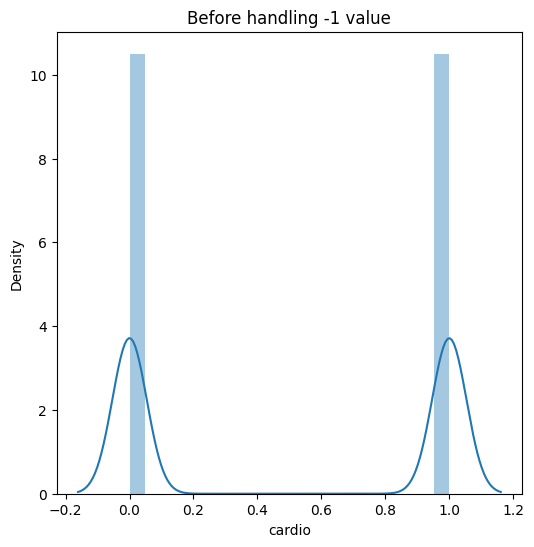

In [ ]:
# Visualising Rating column
plt.figure(figsize=(6,6))
g = sns.distplot(a=Train_data['cardio'])
p = plt.title('Before handling -1 value')

Note: Since the Rating feature follows the Gaussian/Normal Distribution, we'll replace -1 values with mean of the distribution.

<ipython-input-14-043263d8ce32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data['cardio'] = Train_data['cardio'].apply(lambda x: np.NaN if x==-1 else x)
<ipython-input-14-043263d8ce32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data['cardio'] = Train_data['cardio'].fillna(Train_data['cardio'].mean())
<ipython-input-14-043263d8ce32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

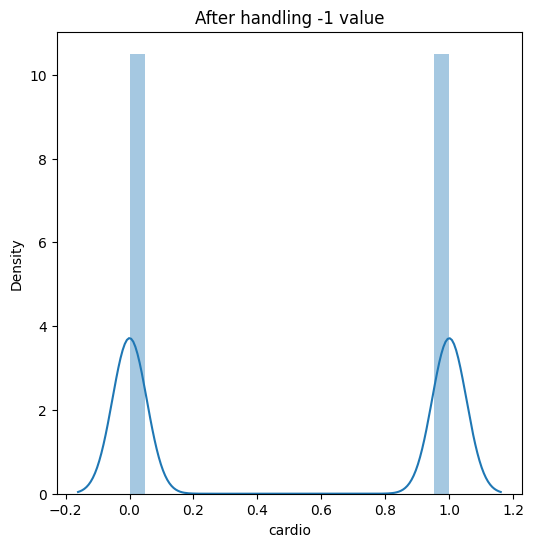

In [ ]:
# Handling -1 values in Rating column
Train_data['cardio'] = Train_data['cardio'].apply(lambda x: np.NaN if x==-1 else x)
Train_data['cardio'] = Train_data['cardio'].fillna(Train_data['cardio'].mean())

plt.figure(figsize=(6,6))
g = sns.distplot(a=Train_data['cardio'])
p = plt.title('After handling -1 value')

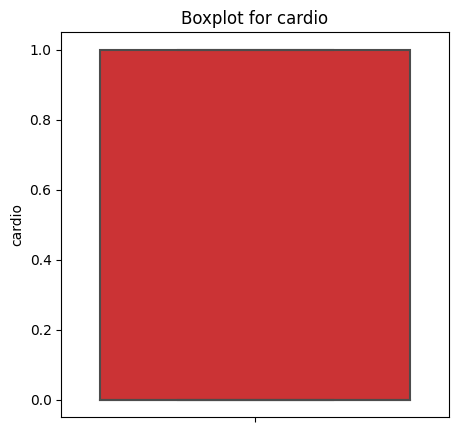

In [ ]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='cardio', data=Train_data, orient='v', palette='Set1')
p = plt.title('Boxplot for cardio')
p = plt.ylabel('cardio')

# **3- Data spliting**

In [12]:
MiceImputed=Train_data

In [13]:
X=MiceImputed.drop('cardio',axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the dataset
scaler.fit(X)

MinMaxScaler()

In [18]:
y=MiceImputed[['cardio']]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **11- Classification Model Training and Evaluation**

We will train a model over a set of training data, providing it a machine-learning algorithm that it can learn from those data and predict future data.

![](https://drive.google.com/uc?export=view&id=1_Qov2L2cAZzFKcf5UY3bMc6ITdnpKfkJ)

## **11.1-Decision Trees**

### **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC_Model= DTC.fit(X_train , y_train)
DTC_Model

DecisionTreeClassifier(max_depth=2, random_state=0)

###**Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = DTC_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.16069714 0.83930286]
 [0.55714674 0.44285326]
 [0.76172377 0.23827623]
 ...
 [0.55714674 0.44285326]
 [0.55714674 0.44285326]
 [0.40183627 0.59816373]]


**Accuracy**

In [ ]:
y_pred_DT = DTC.predict(X_test)
DT_Acc=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.7107


**Confusion Matrix**



confusion matrix


[[8385 2059]
 [4017 6539]]




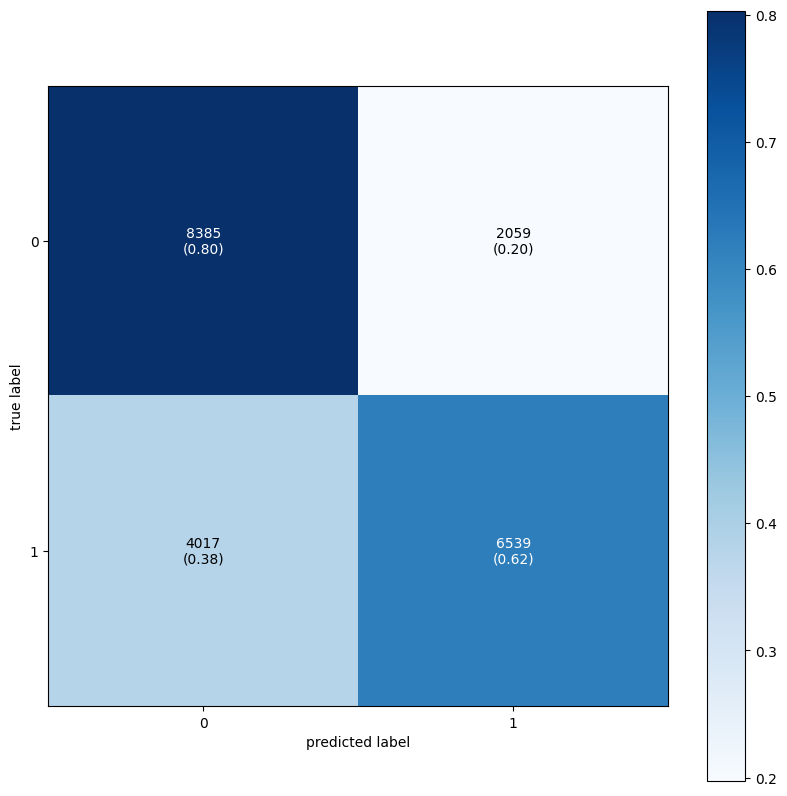

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_DT)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_DT)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.68      0.80      0.73     10444
           1       0.76      0.62      0.68     10556

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000





**ROC CURVE**

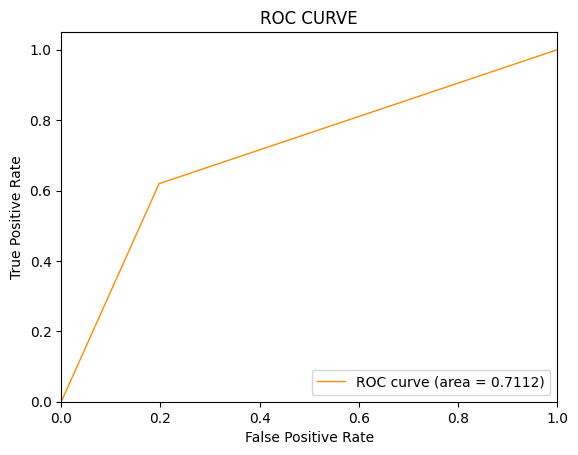

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**11.2-Random Forest**

### **Model training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = RF_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.24818567 0.75181433]
 [0.60627299 0.39372701]
 [0.66112198 0.33887802]
 ...
 [0.53483205 0.46516795]
 [0.57426885 0.42573115]
 [0.36477529 0.63522471]]


**Accuracy**

In [ ]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

Accuracy score= 0.7229


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8105 2339]
 [3481 7075]]




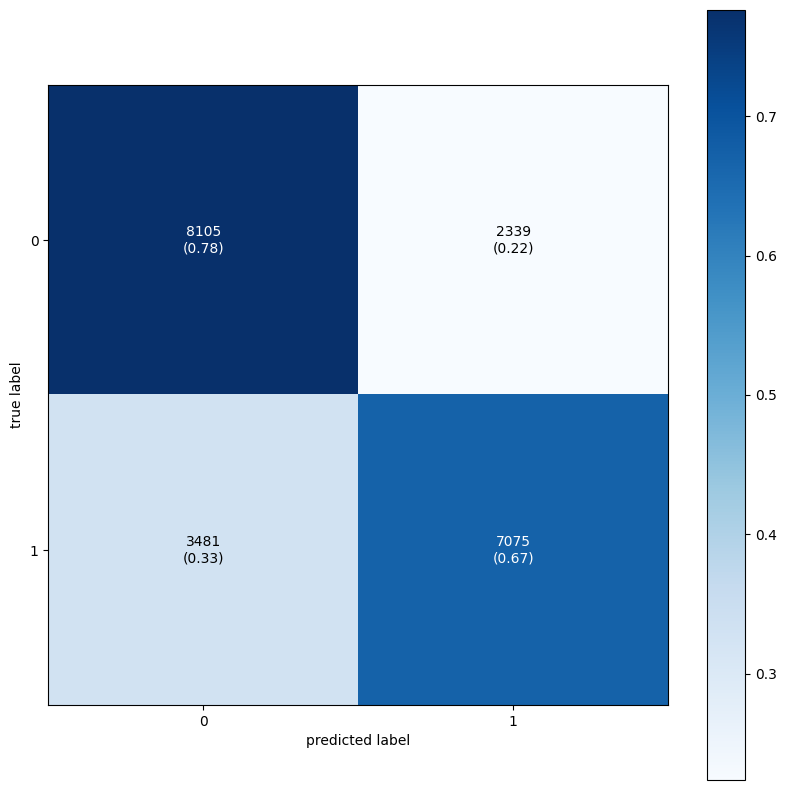

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10444
           1       0.75      0.67      0.71     10556

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

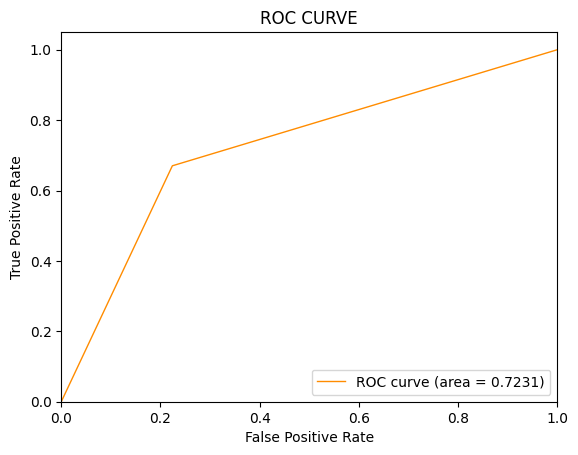

In [ ]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.3-SVM Support Vector Machine**

### **Model Training**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
import sklearn.svm


In [ ]:

#svc=svm.LinearSVC()
svc = sklearn.svm.SVC(kernel='linear', C=1.0)

SVM_Model= svc.fit(X_train , y_train)
SVM_Model

SVC(kernel='linear')

### **Model Evaluation**

**Accuracy**

In [ ]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

Accuracy score= 0.6463


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[7387 3057]
 [4370 6186]]




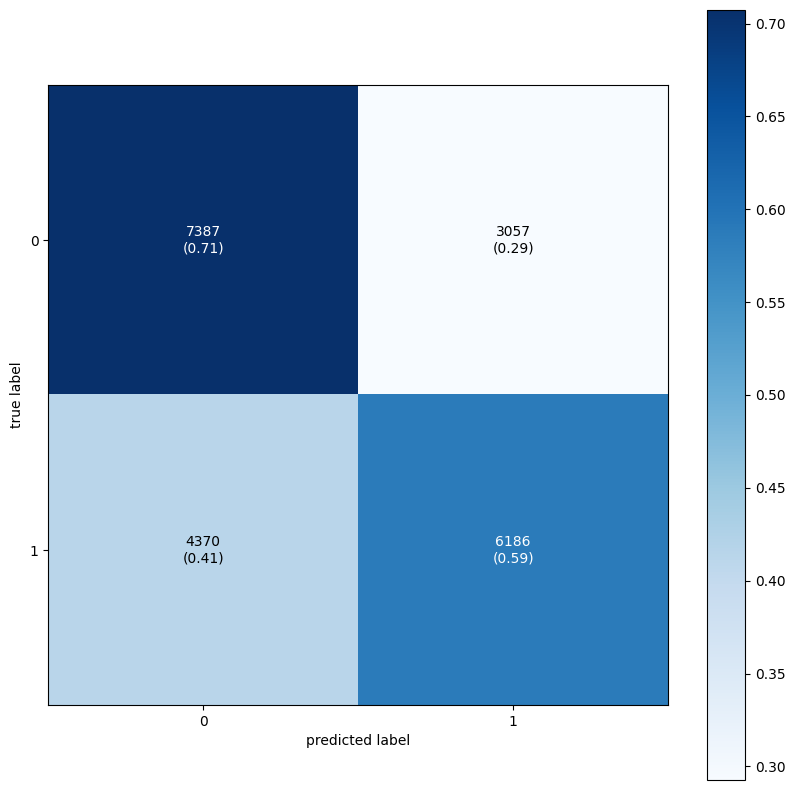

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CM_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.63      0.71      0.67     10444
           1       0.67      0.59      0.62     10556

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

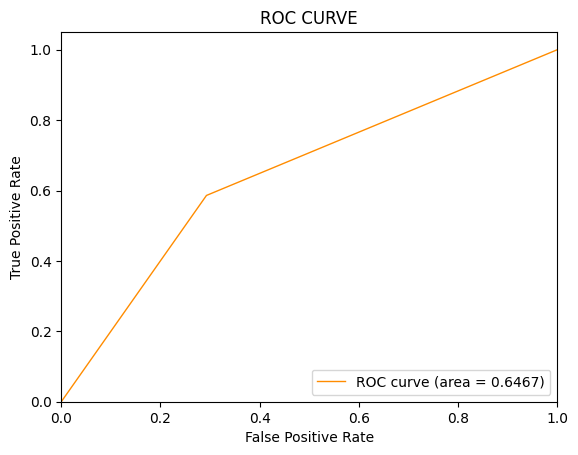

In [ ]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.4-Logistic Regression(LR)**

In [ ]:
import sklearn.linear_model

# Create an instance of the LogisticRegression class
logistic_regression = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1.0)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Predict the labels of new data
y_pred = logistic_regression.predict(X_test)

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
LR= LogisticRegression(solver='lbfgs', C=1.0)
LR_Model= LR.fit(X_train , y_train)
LR_Model

LogisticRegression()

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LR_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.52044409 0.47955591]
 [0.57749304 0.42250696]
 [0.53223926 0.46776074]
 ...
 [0.39934232 0.60065768]
 [0.47992569 0.52007431]
 [0.32751584 0.67248416]]


**Accuracy**

In [ ]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

Accuracy score= 0.6476


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


              precision    recall  f1-score   support

           0       0.68      0.80      0.73     10444
           1       0.76      0.62      0.68     10556

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000





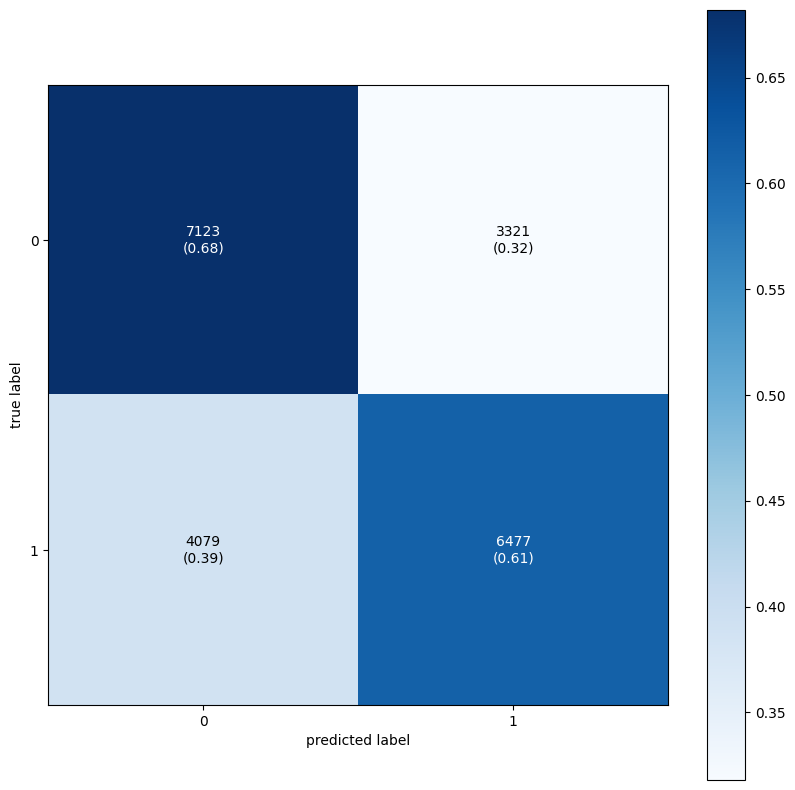

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10444
           1       0.66      0.61      0.64     10556

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

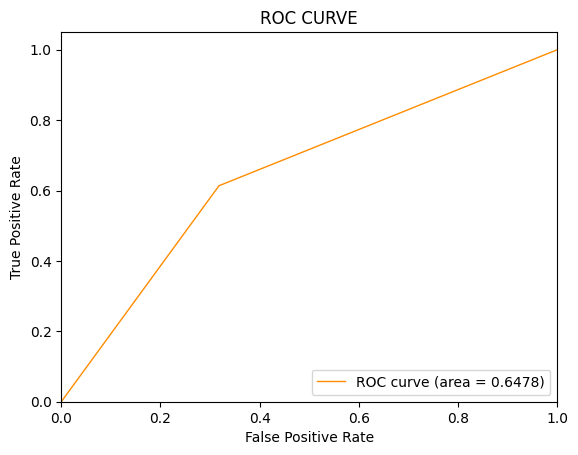

In [ ]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.5 KNN Algorithm**

### **Model Training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

KNeighborsClassifier()

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = KNN_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.6 0.4]
 [0.4 0.6]
 [0.4 0.6]
 ...
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]]


**Accuracy**

In [ ]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

Accuracy score= 0.6064


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[6464 3980]
 [4286 6270]]




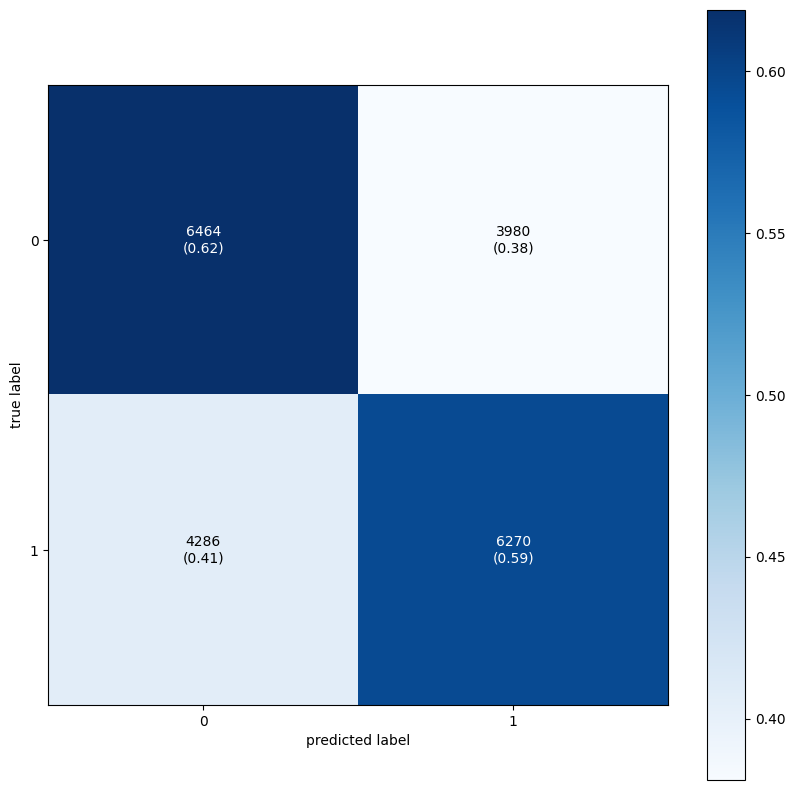

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.59      0.61      0.60     10444
           1       0.60      0.59      0.60     10556

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

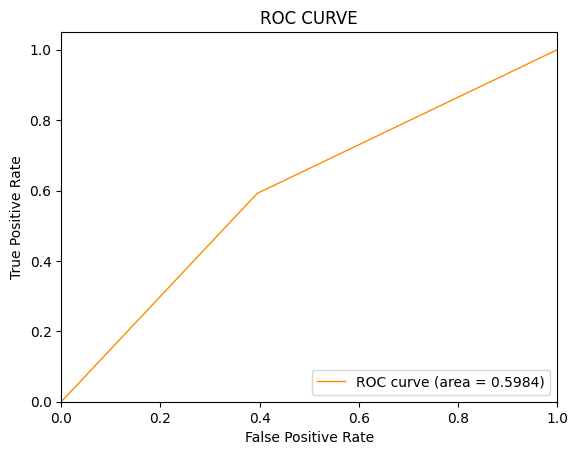

In [ ]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.6-Naive Bayes (NB)**

### **Modle Training**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:

NB = GaussianNB()
NB_Model= NB.fit(X_train , y_train)
NB_Model

GaussianNB()

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = NB_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.93307813 0.06692187]
 [0.96732198 0.03267802]
 [0.94418592 0.05581408]
 ...
 [0.92096265 0.07903735]
 [0.9547371  0.0452629 ]
 [0.72818794 0.27181206]]


**Accuracy**

In [ ]:
y_pred_NB = NB_Model.predict(X_test)
NB_Acc=NB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NB_Model.score(X_test, y_test)))

Accuracy score= 0.5844


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[9656  788]
 [7940 2616]]




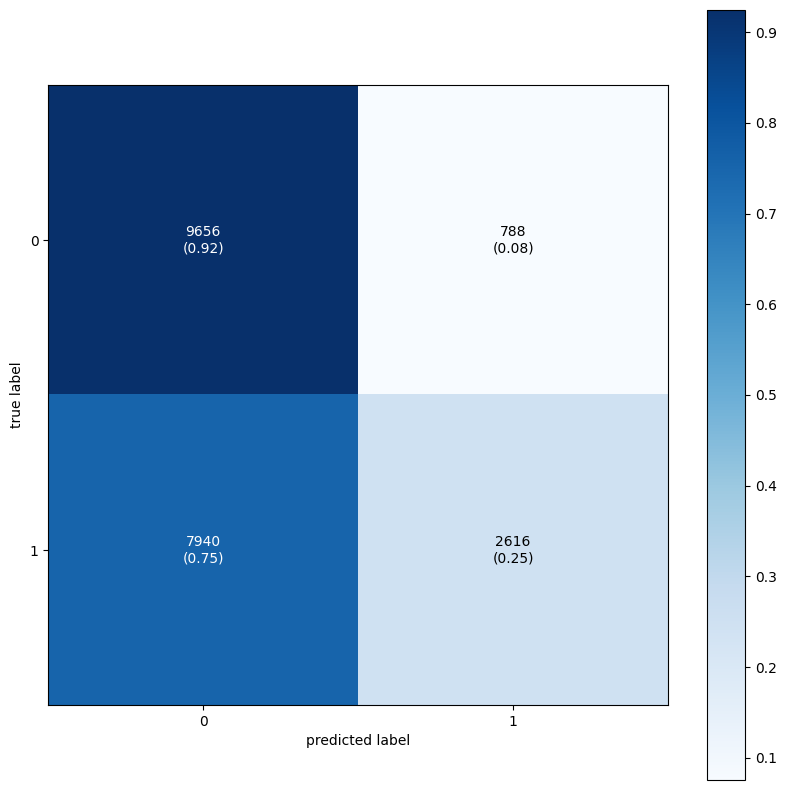

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NB=confusion_matrix(y_test, y_pred_NB)
print(CM_NB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NB=classification_report(y_test, y_pred_NB)
print(CM_NB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.55      0.92      0.69     10444
           1       0.77      0.25      0.37     10556

    accuracy                           0.58     21000
   macro avg       0.66      0.59      0.53     21000
weighted avg       0.66      0.58      0.53     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc


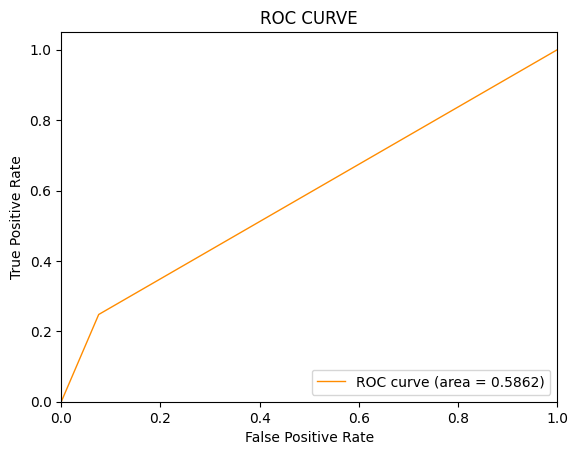

In [ ]:
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.7- Deep Neural Multilayer Perceptron (MLP)**

Here are some additional things to keep in mind when training an MLPClassifier:

The number of hidden layers and the number of neurons in each layer can have a significant impact on the performance of the model. Experiment with different values to find the best configuration for your data.

The activation function can also affect the performance of the model. Common activation functions for classification include sigmoid,tanh, and relu.
The solver is the algorithm used to train the model. Common solvers include lbfgs, sgd, and adam.

The learning rate is the step size used to update the weights of the model during training. A small learning rate will result in slower training, but a large learning rate may lead to overfitting.

The early_stopping parameter can be used to stop training the model early if it is not improving. This can help to prevent overfitting.

The validation_fraction parameter can be used to specify the fraction of the training data that should be used for validation. This can help to prevent overfitting.

alpa= 0.01 acc.73 , solver=lbfgs

### **Model Training**

In [20]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='adam', activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,100,100,100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True,
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
NN_Model= NN.fit(X_train , y_train)
NN_Model

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100),
              max_iter=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
estimator = MLPClassifier()
param_grid = {'activation': ['identity', 'logistic', 'tanh','ReLU'], 'hidden_layer_sizes': [(100, ), (200, ), (300, )],'solver':['sgd','adam','lbfgs'],'alpha':[0.001,0.05],'learning_rate':['constand','adaptive'] }
gscv = GridSearchCV(estimator, param_grid, cv=5)

In [ ]:
gscv.fit(X_train, y_train)

NameError: ignored

In [ ]:
best_params = gscv.best_params_
best_score = gscv.best_score_

NameError: ignored

In [ ]:
best_score

0.7223877551020408

In [ ]:
best_params

{'activation': 'tanh', 'hidden_layer_sizes': (200,)}

In [ ]:
best_estimator = gscv.best_estimator_
best_estimator.fit(X_train, y_train)

MLPClassifier(activation='identity')

In [ ]:
y_pred = best_estimator.predict(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='adam', activation='sigmoid', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,100,100,100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True,
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(NN,X, y, cv=kf, scoring='accuracy')

# Print the average accuracy
print(scores.mean())


ValueError: ignored

### **Model Evulation**

**Predict Class Probability**

In [ ]:
preds_proba = NN_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.36754765 0.63245235]
 [0.66421564 0.33578436]
 [0.69471057 0.30528943]
 ...
 [0.40609613 0.59390387]
 [0.5758199  0.4241801 ]
 [0.50534521 0.49465479]]


**Accuracy**

In [21]:
y_pred_NN = NN.predict(X_test)
NN_Acc=NN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NN_Model.score(X_test, y_test)))

Accuracy score= 0.7253


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8063 2381]
 [3320 7236]]




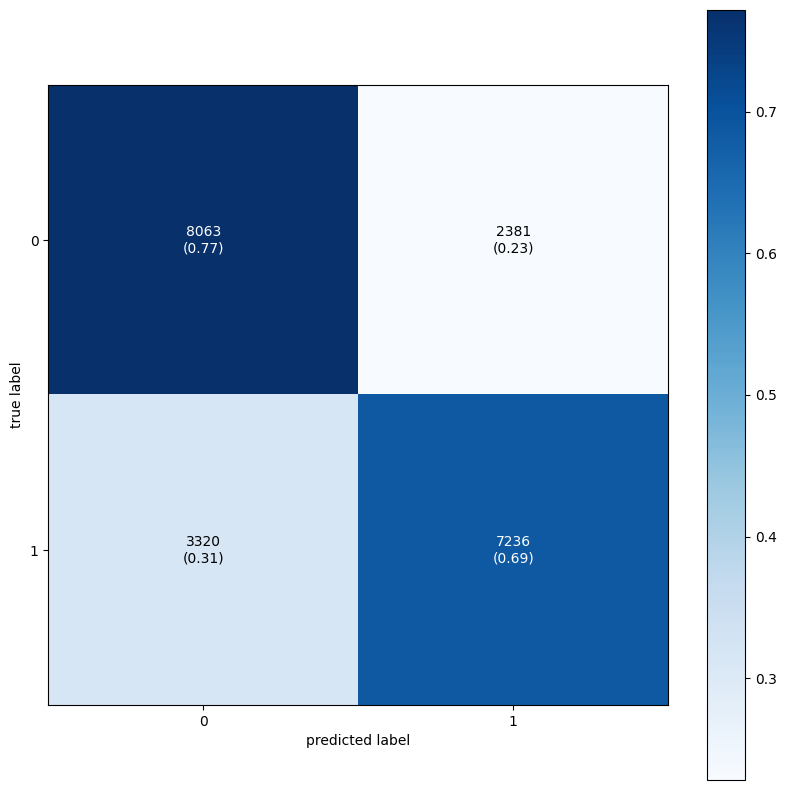

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NN=confusion_matrix(y_test, y_pred_NN)
print(CM_NN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NN=classification_report(y_test, y_pred_NN)
print(CM_NN)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10444
           1       0.75      0.69      0.72     10556

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

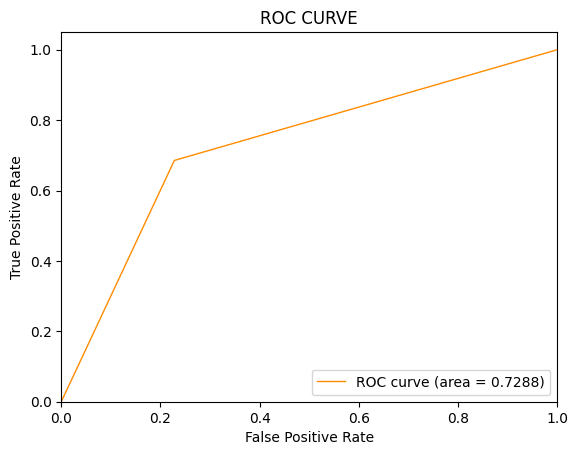

In [ ]:
fpr_NN, tpr_NN, thresholds = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.8- XGBoost or Gradient Boosting (GB)**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier
GB=XGBClassifier()
GB_Model= GB.fit(X_train , y_train)
GB_Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = GB_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.19078463 0.80921537]
 [0.59601176 0.40398827]
 [0.52264965 0.47735038]
 ...
 [0.2727859  0.7272141 ]
 [0.55342066 0.4465793 ]
 [0.39013046 0.60986954]]


**Accuracy**

In [ ]:
y_pred_GB = GB.predict(X_test)
GB_Acc=GB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(GB_Model.score(X_test, y_test)))

Accuracy score= 0.7305


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8081 2363]
 [3296 7260]]




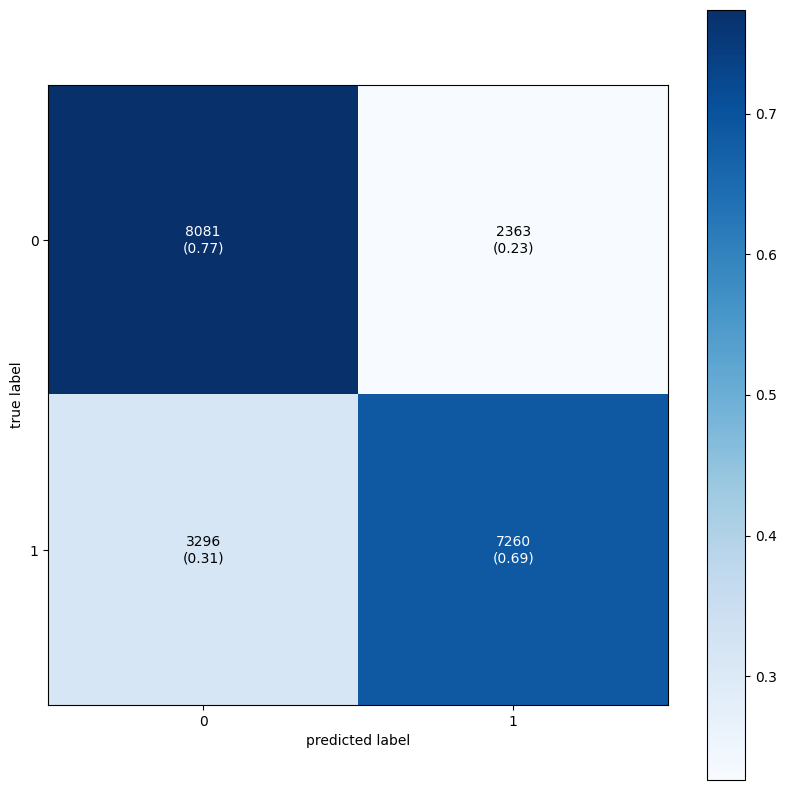

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_GB=confusion_matrix(y_test, y_pred_GB)
print(CM_GB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_GB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_GB=classification_report(y_test, y_pred_GB)
print(CR_GB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10444
           1       0.75      0.69      0.72     10556

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000





**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

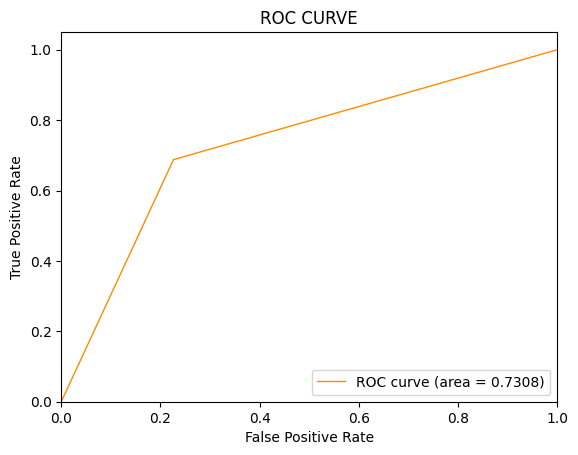

In [ ]:
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, y_pred_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_GB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 11.9 **ExtraTreeClassifier(ET)**

### **Model Training**

In [ ]:
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier(random_state=0, max_depth=2)
ET_model= ET.fit(X_train , y_train)
ET_model

ExtraTreeClassifier(max_depth=2, random_state=0)

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = ET_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.54684077 0.45315923]
 [0.54684077 0.45315923]
 [0.54684077 0.45315923]
 ...
 [0.49512874 0.50487126]
 [0.54684077 0.45315923]
 [0.54684077 0.45315923]]


**Accuracy**

In [ ]:
y_pred_ET = ET_model.predict(X_test)
ET_Acc=ET_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(ET_model.score(X_test, y_test)))

Accuracy score= 0.5658


**Confusion Matrix**





confusion matrix


[[8148 2296]
 [6822 3734]]




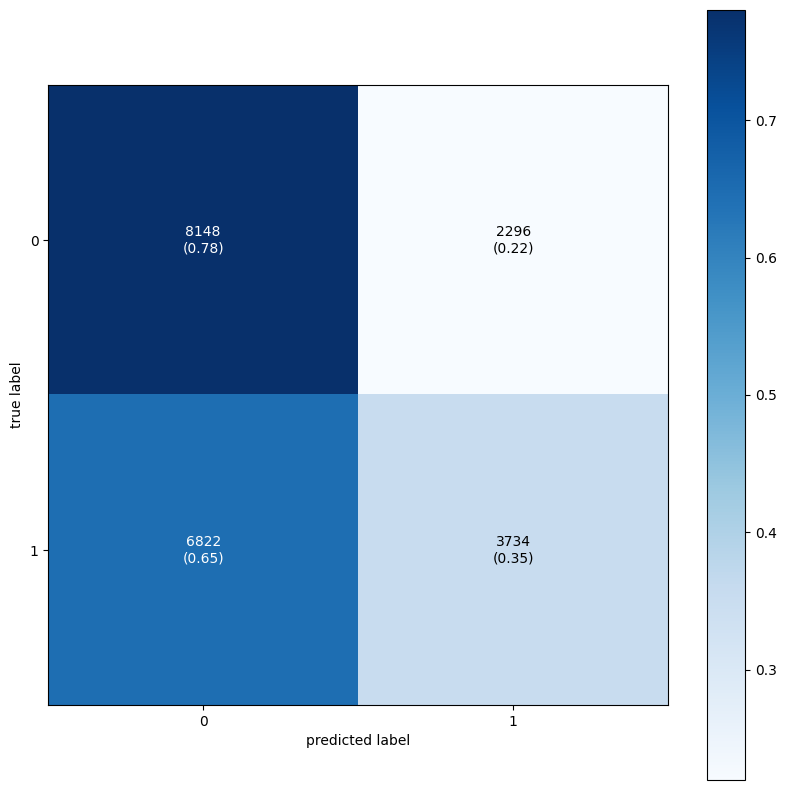

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_ET=confusion_matrix(y_test, y_pred_ET)
print(CM_ET)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_ET,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_ET=classification_report(y_test, y_pred_ET)
print(CR_ET)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.54      0.78      0.64     10444
           1       0.62      0.35      0.45     10556

    accuracy                           0.57     21000
   macro avg       0.58      0.57      0.55     21000
weighted avg       0.58      0.57      0.55     21000





**ROC CURVE**



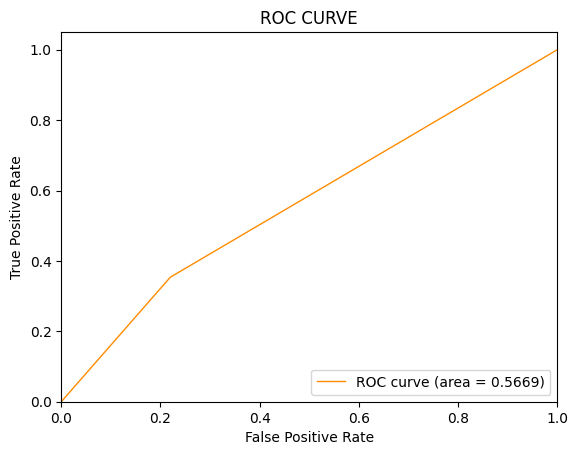

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_ET, tpr_ET, thresholds = roc_curve(y_test, y_pred_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_ET)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.10 LGBMClassifier**

### **Model Training**

In [ ]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
LGBM_model= LGBM.fit(X_train , y_train)
LGBM_model

[LightGBM] [Info] Number of positive: 24423, number of negative: 24577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498429 -> initscore=-0.006286
[LightGBM] [Info] Start training from score -0.006286


LGBMClassifier(n_estimators=10, objective='binary')

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LGBM_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.2932699  0.7067301 ]
 [0.59787    0.40213   ]
 [0.63343003 0.36656997]
 ...
 [0.45265394 0.54734606]
 [0.52962706 0.47037294]
 [0.48585182 0.51414818]]



**Accuracy**

In [ ]:
y_pred_LGBM = LGBM_model.predict(X_test)
LGBM_Acc=LGBM_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LGBM_model.score(X_test, y_test)))

Accuracy score= 0.7305


**Confusion Matrix**





confusion matrix


[[8346 2098]
 [3562 6994]]




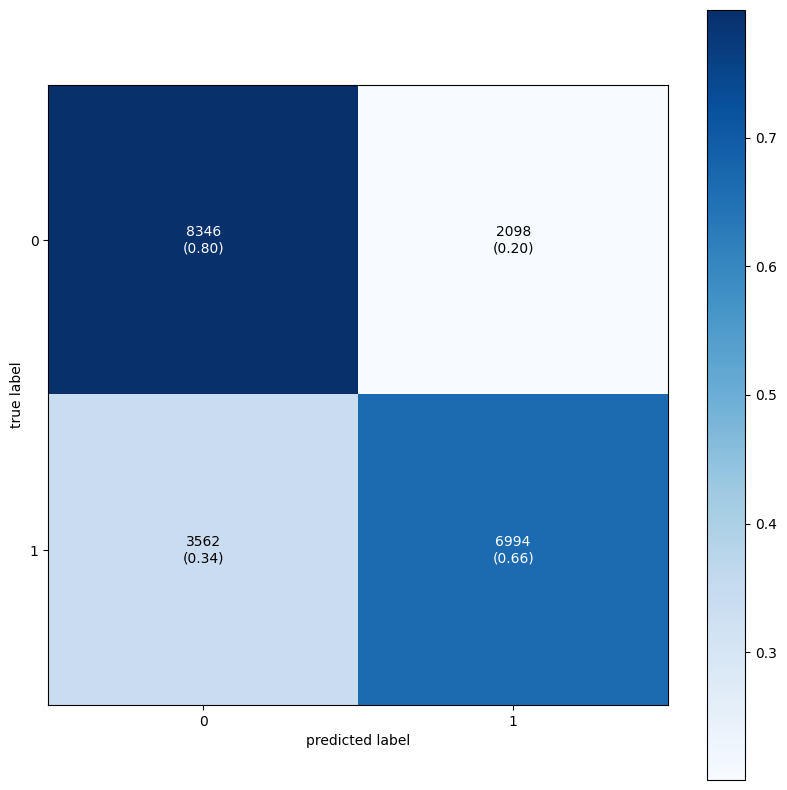

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_LGBM=confusion_matrix(y_test, y_pred_LGBM)
print(CM_LGBM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LGBM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LGBM=classification_report(y_test, y_pred_LGBM)
print(CR_LGBM)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10444
           1       0.77      0.66      0.71     10556

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000





**ROC CURVE**



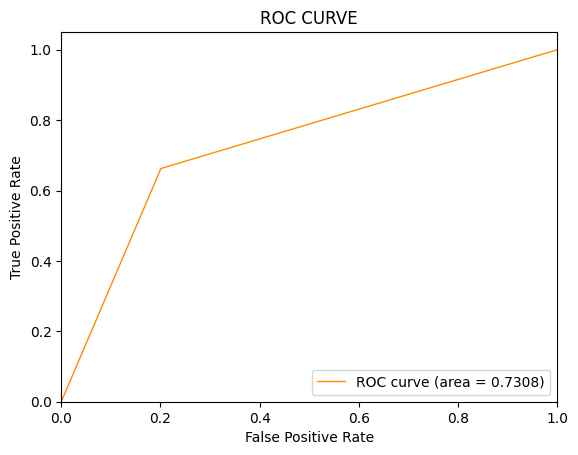

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_pred_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)
plt.figure()
plt.plot(fpr_LGBM, tpr_LGBM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LGBM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.11 CatBoost**

### **Model Training**


In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostClassifier, Pool

In [ ]:

#CTB = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'Logloss'})
CTB= CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CTB_Model= CTB.fit(X_train , y_train)
CTB_Model

0:	learn: 0.5837756	total: 52.9ms	remaining: 52.9ms
1:	learn: 0.5651702	total: 57.5ms	remaining: 0us


### **Model evaluation**


**Predict Class Probability**

In [ ]:
preds_class = CTB_Model.predict(X_test)
preds_proba = CTB_Model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [1 0 0 ... 0 0 1]
proba =  [[0.18166365 0.81833635]
 [0.64759936 0.35240064]
 [0.78469648 0.21530352]
 ...
 [0.64759936 0.35240064]
 [0.64759936 0.35240064]
 [0.23072208 0.76927792]]


**Accuracy**



In [ ]:

y_pred_CTB = CTB_Model.predict(X_test)
CTB_Acc=CTB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(CTB_Model.score(X_test, y_test)))

Accuracy score= 0.7217


**Confusion Matrix**





confusion matrix


[[8084 2360]
 [3485 7071]]




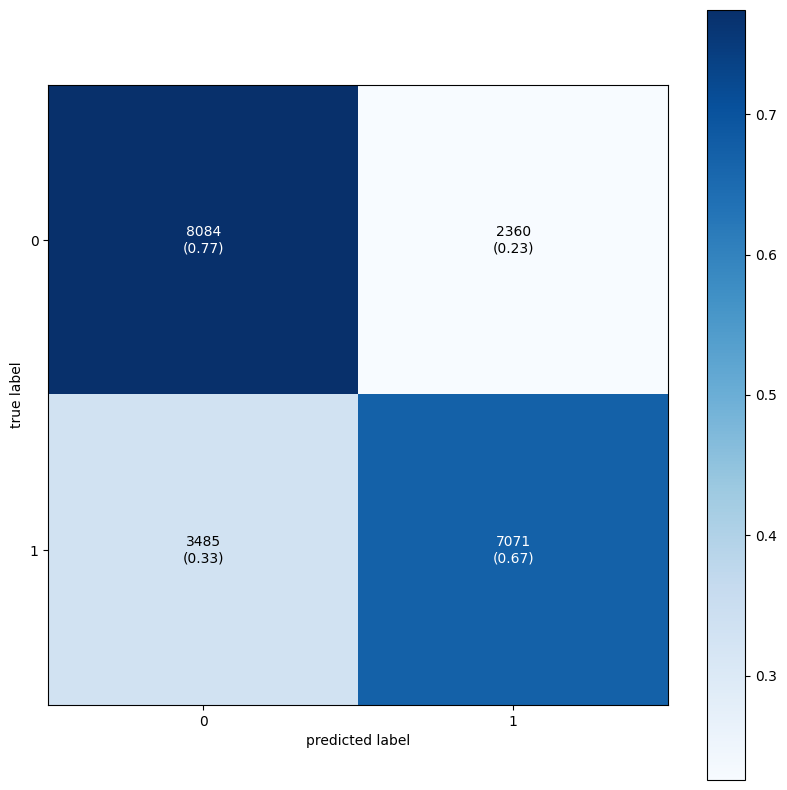

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_CTB=confusion_matrix(y_test, y_pred_CTB)
print(CM_CTB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_CTB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_CTB=classification_report(y_test, y_pred_CTB)
print(CR_CTB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10444
           1       0.75      0.67      0.71     10556

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000





**ROC CURVE**



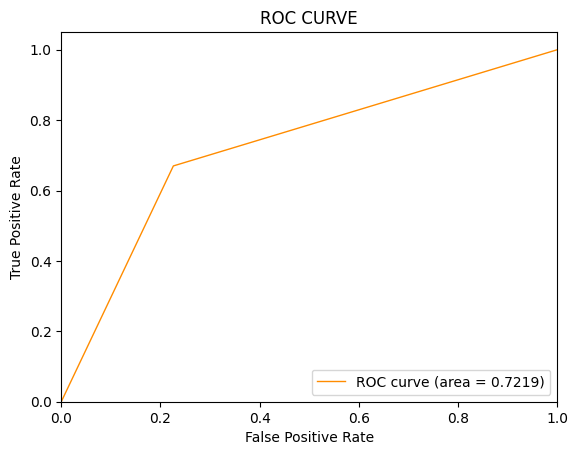

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_CTB, tpr_CTB, thresholds = roc_curve(y_test, y_pred_CTB)
roc_auc_CTB = auc(fpr_CTB, tpr_CTB)
plt.figure()
plt.plot(fpr_CTB, tpr_CTB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_CTB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **12-Compare Modle performance**

## **12.1-ROC Curve for Models**

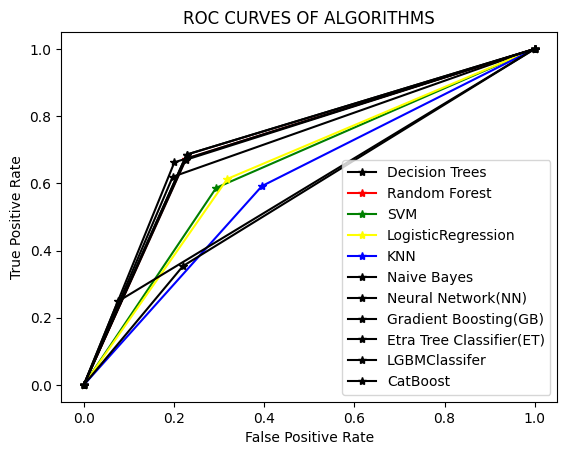

In [ ]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.plot(fpr_NB, tpr_NB, marker='*', label='Naive Bayes', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Neural Network(NN)', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Gradient Boosting(GB)', color = 'black')
plt.plot(fpr_ET, tpr_ET, marker='*', label='Etra Tree Classifier(ET)', color = 'black')
plt.plot(fpr_LGBM, tpr_LGBM, marker='*', label='LGBMClassifer', color = 'black')
plt.plot(fpr_CTB, tpr_CTB, marker='*', label='CatBoost', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **12.2-Comparison of all algorithms Results**

In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
x.add_row(["Naive Bayes", round(NB_Acc,4)])
x.add_row(["Neural Network", round(NN_Acc,4)])
x.add_row(["Gradient Boosting", round(GB_Acc,4)])
x.add_row(["ExtraTree Classifer ", round(ET_Acc,4)])
x.add_row(["LGBM Classifier ", round(LGBM_Acc,4)])
x.add_row(["CatBoost ", round(CTB_Acc,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.7107  |
|     Random Forest Algorithm      |  0.723   |
| Support Vector Machine Algorithm |  0.6462  |
|   LogisticRegression Algorithm   |  0.6473  |
|          KNN Algorithm           |  0.5984  |
|           Naive Bayes            |  0.5846  |
|          Neural Network          |  0.7285  |
|        Gradient Boosting         |  0.7305  |
|       ExtraTree Classifer        |  0.5658  |
|         LGBM Classifier          |  0.7305  |
|            CatBoost              |  0.7217  |
+----------------------------------+----------+




# **13-Using GridSearchCV to find the best algorithm for this problem [3]**

In [22]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [0.1, 1, 10],
                'kernel': ['rbf','linear']
            }
        },

        'MLP': {
            'model': MLPClassifier(solver='lbfgs', activation='relu'),
            'parameters': {
                'hidden_layer_sizes': [(100, ), (50,50 ), (100,50 )],
                'solver': ['adam', 'lbfgs'],
                'activation': ['relu','identity', 'logistic', 'tanh'],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
            }
        }

    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

KeyboardInterrupt: 

Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.

In [24]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

KeyboardInterrupt: 

In [ ]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

# **References**


[1- 7 Essential Data Quality Checks with Pandas](https://www.kdnuggets.com/7-essential-data-quality-checks-with-pandas?fbclid=IwAR23A1dcPkhAlG8eSD_CkFNxZH3yui9H5D32JdSCduhWNopZiz3Ydp_AIaM)

[2- Machine Learning with Neural Networks Using scikit-learn](https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn)

[3- Data Scientist's Salary Prediction](https://github.com/anujvyas/Machine-Learning-Projects/blob/master/Data%20Scientist's%20Salary%20Prediction/Data%20Scientist's%20Salary%20Prediction.ipynb)




